In [1]:
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [2]:
# 붓꽃 데이터셋 불러오기 - 꽃잎(petal), 꽃받침(sepal)의 길이/너비를 기반으로 종 감지

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
iris["data"].shape

(150, 4)

In [4]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', None)
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
from sklearn.tree import DecisionTreeClassifier 

X = iris.data[:, 2:] # 결정트리의 특성상 꽃잎의 길이와 너비만 사용
y = iris.target

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

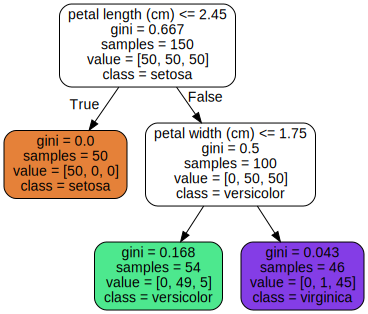

In [8]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

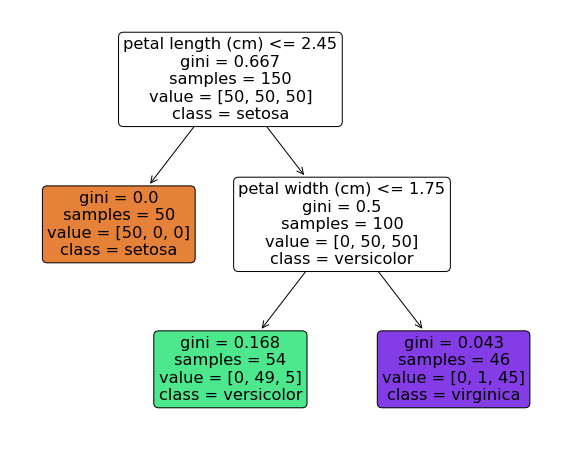

In [13]:
# 사이킷런 이용 시

from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree_clf,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        max_depth=2,
        rounded=True,
        filled=True)
plt.show()

# **클래스 확률 추정**

하나의 샘플이 특정 클래스(K)에 속할 확률을 추정 가능

In [11]:
tree_clf.predict([[5, 1.5]]) # 꽃잎의 길이가 5cm이고, 너비가 1.5cm인 경우

array([1])

In [12]:
tree_clf.predict_proba([[5, 1.5]]) # 해당 클래스에 들어갈 확률 ["Setosa, Versicolor, Virginica"]

array([[0.        , 0.90740741, 0.09259259]])

# **CART 훈련 알고리즘**

사이킷런에서는 트리 확장을 위해 CART(Classification and Regression tree) 알고리즘을 사용

CART 알고리즘은 의사결정트리 방법론 중 잘 알려진 방법론 중 하나로, 지니불순도를 이용하여 계산

ㅇ **지니불순도** : 2번에 걸쳐 전체에서 해당 클래스가 나올 확률을 구하고, 각각의 구해진 확률의 합을 1에서 뺀 값
* 1- (Value 개수/Samples 개수)^2의 합
 

ㅇ **CART의 트리 확장 방법** : 지니불순도에 좌우 가지에 해당하는 샘플 수의 비율을 가중치로 곱해서 전체 오차값을 계산
* 최소가 되는 값을 선정함으로써 최적의 분기 결정(완벽한 최적의 트리를 찾는 것은 불가능 - NP완전문제)

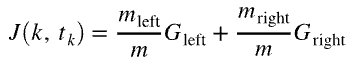

* G : 지니불순도  / M :샘플수

엔트로피 불순도를 이용할 수도 있는데, 엔트로피 불순도는 제곱이 아닌 로그를 취함.

사이킷런에서의 디폴트는 지니불순도로, 엔트로피를 사용하고 싶으면, 
위의 tree_clf =DecisionTreeClassifier(random_state=42, max_depth=2)에 (criterion='entropy')를 추가

# **계산복잡도**

계산복잡도는 빅오표기법(알고리즘의 성능을 수학적으로 표기해 주는 표기법)을 이용할 수 있으며, 예측을 하려면 루트노드에서부터 리프노드까지 탐색 필요

ㅇ 이진 검색이므로, 한 번 검색할 때마다 검색해야 하는 데이터의 양이 절반으로 줄어들기 때문에 탐색 복잡도는 O(log(n))

ㅇ 훈련 시에는 모든 샘플 데이터의 특성을 비교하여야 되기 때문에 훈련 복잡도는 O(m * nlog(n))

- 훈련 데이터셋이 적을 경우, 위의 presort 값을 True로 변경하면 훈련 속도를 높일 수 있음(단, 훈련 데이터셋이 많으면 느려짐)
